# Data Analysis


**Who**
All individual donors who gave to the c3 recorded in NGP, minus monthly donors. We have  
We’re working with 2,329 donors in this analysis.

**Approach**
This is what I would call an “exploratory data analysis.” My goal here was to simply understand or donor data and start asking questions. Like every good analysis, I wound up with more questions than I was able to answer.   

**I started my analysis by asking the questions:**  
How many of our donors give below \\$100? Below \\$500? Below \\$1,000?  
What’s the average lifetime value of our donors?  
How many of our donors give once and then never again?  
Who loves us the most (donors with the most gifts)?  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
datetime.datetime.strptime

%matplotlib inline

In [2]:
data = pd.read_csv("data/historical_data.csv")
data.head()

,Contact Name,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Contribution.Note,Source Code Path,Contact ID
0,4112,NaN,VNW16CGKCY8,2011-07-08,2000.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHGYZ0
1,1966,NaN,VNW16CGJP70,2013-10-11,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGHVH14
2,4716,NaN,VNW16E3PPR3,2015-12-22,2500.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGJ1973
3,4793,NaN,VNW16CGFH74,2008-02-07,21.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH3992
4,1932,NaN,VNW16CGDHA2,2007-03-21,50.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,NaN,VNX0EGH2VW2


## Liftime Value

In [3]:
donors_by_lifetime = data.groupby([' Contact Name'])['Amount'].sum().sort_values(ascending = False).to_frame()
donors_by_lifetime.columns = ['lifetime_amount']
donors_by_lifetime.head(15)

,lifetime_amount
Contact Name,
4421,301000.0
673,50000.0
5780,50000.0
6974,35500.0
813,35000.0
6980,35000.0
1456,26100.0
3058,25000.0
6093,25000.0


### Distribution of Lifetime Values

In [4]:
donors_100_1000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 100) & (donors_by_lifetime["lifetime_amount"] <= 1000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


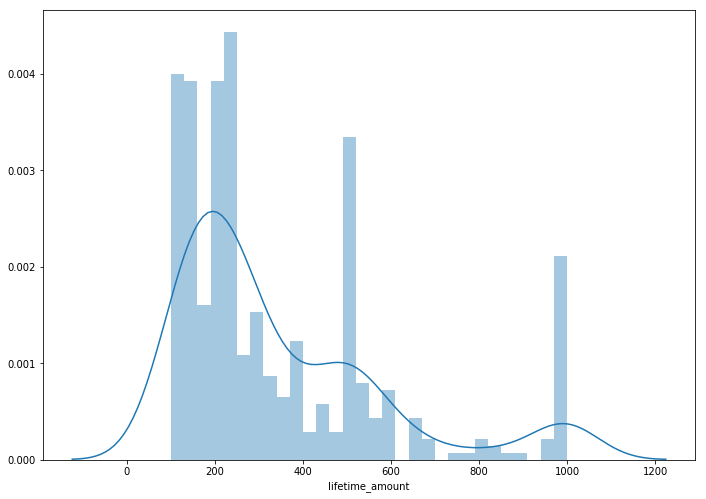

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_100_1000['lifetime_amount'], bins = 30)

In [6]:
donors_900_10000 = donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] > 900) & (donors_by_lifetime["lifetime_amount"] <= 10000)]

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


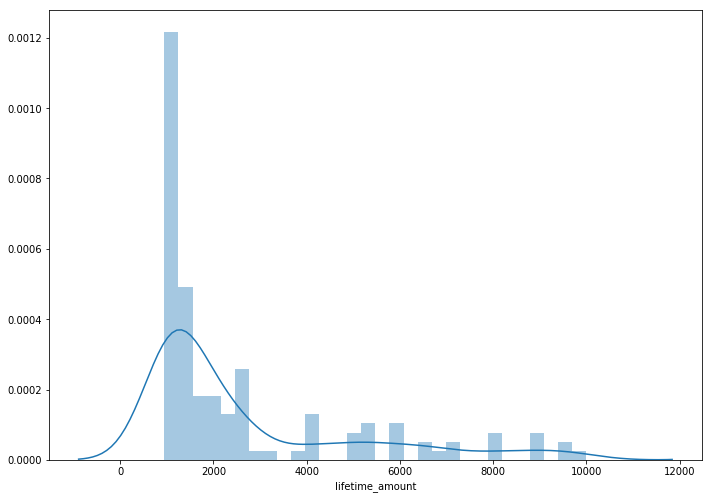

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.distplot(donors_900_10000['lifetime_amount'], bins = 30)

## Quick Check on Lifetime Amounts  

8.8% of donors have a lifetime value of \\$1,000 or more. Given our definition of a major donor being someone who have given \\$1,000 or more, this means that 91% of our donors are small dollar donors.

In [8]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] == 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.014752
dtype: float64

In [9]:
donors_by_lifetime.loc[(donors_by_lifetime["lifetime_amount"] >= 1000)].count()/len(donors_by_lifetime)

lifetime_amount    0.075342
dtype: float64

In [10]:
by_gifts = data.groupby([' Contact Name']).size().sort_values(ascending = False).to_frame()
by_gifts.columns = ['number_of_gifts']
by_gifts.head(15)

,number_of_gifts
Contact Name,
3086,77
1627,57
4243,54
5923,53
1487,53
7299,52
6570,51
629,49
6571,48


## Repeat Donors


In [11]:
by_gifts.loc[by_gifts['number_of_gifts'] == 1].count()

number_of_gifts    1254
dtype: int64

In [12]:
by_gifts.loc[by_gifts['number_of_gifts'] == 1].count()/len(by_gifts)

number_of_gifts    0.660695
dtype: float64

In [13]:
repeat_donors = by_gifts.loc[by_gifts['number_of_gifts'] != 1]